## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

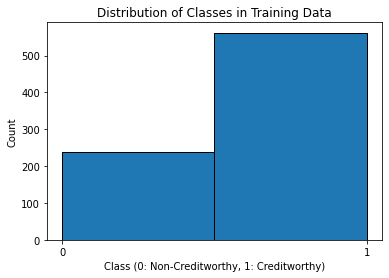

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
if data.isnull().values.any():
    data = data.dropna()

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз вероятностей на тестовых данных
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, np.round(rf_pred_proba))
rf_precision = precision_score(y_test, np.round(rf_pred_proba))
rf_recall = recall_score(y_test, np.round(rf_pred_proba))

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз вероятностей на тестовых данных
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, np.round(gb_pred_proba))
gb_precision = precision_score(y_test, np.round(gb_pred_proba))
gb_recall = recall_score(y_test, np.round(gb_pred_proba))

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.92
Accuracy: 0.83
Precision: 0.85
Recall: 0.82

Gradient Boosting метрики:
ROC AUC: 0.89
Accuracy: 0.80
Precision: 0.84
Recall: 0.76


In [3]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
if data.isnull().values.any():
    data = data.dropna()

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Параметры для поиска
param_distributions = {
    'hidden_layer_sizes': [(50, 25), (100, 50), (100, 100, 50), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],  # Увеличение максимального числа итераций
}

# Оптимизация MLPClassifier с RandomizedSearchCV
mlp_model = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
random_search = RandomizedSearchCV(mlp_model, param_distributions, n_iter=100, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Лучшая модель
best_mlp_model = random_search.best_estimator_

# Прогноз вероятностей на тестовых данных
mlp_pred_proba = best_mlp_model.predict_proba(X_test_scaled)[:, 1]

# Расчет метрик для MLP
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, np.round(mlp_pred_proba))
mlp_precision = precision_score(y_test, np.round(mlp_pred_proba))
mlp_recall = recall_score(y_test, np.round(mlp_pred_proba))

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")



MLP (Neural Network) метрики:
ROC AUC: 0.87
Accuracy: 0.79
Precision: 0.78
Recall: 0.82


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели